In [52]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# set darkgrid style
sns.set_style("darkgrid")
# scale fonts:
sns.set(font_scale=1.25)
matplotlib.rcParams['figure.figsize'] = 10.0, 5.0

In [53]:
# Load data
df = pd.read_csv('overhead_exp_parsed.csv')

df.groupby('File').count()

,overhead,unrecovered,run,Method,RS,#Chunks
File,,,,,,
0010-bmp.bmp,5,5,5,5,5,5
0011-bmp.bmp,5,5,5,5,5,5
0012-bmp.bmp,5,5,5,5,5,5
0013-bmp.bmp,5,5,5,5,5,5
0014-bmp.bmp,7,7,7,7,7,7
0020-xlsx.xlsx,35,35,35,35,35,35
0021-xlsx.xlsx,28,28,28,28,28,28
0022-xlsx.xlsx,65,65,65,65,65,65
0023-xlsx.xlsx,65,65,65,65,65,65


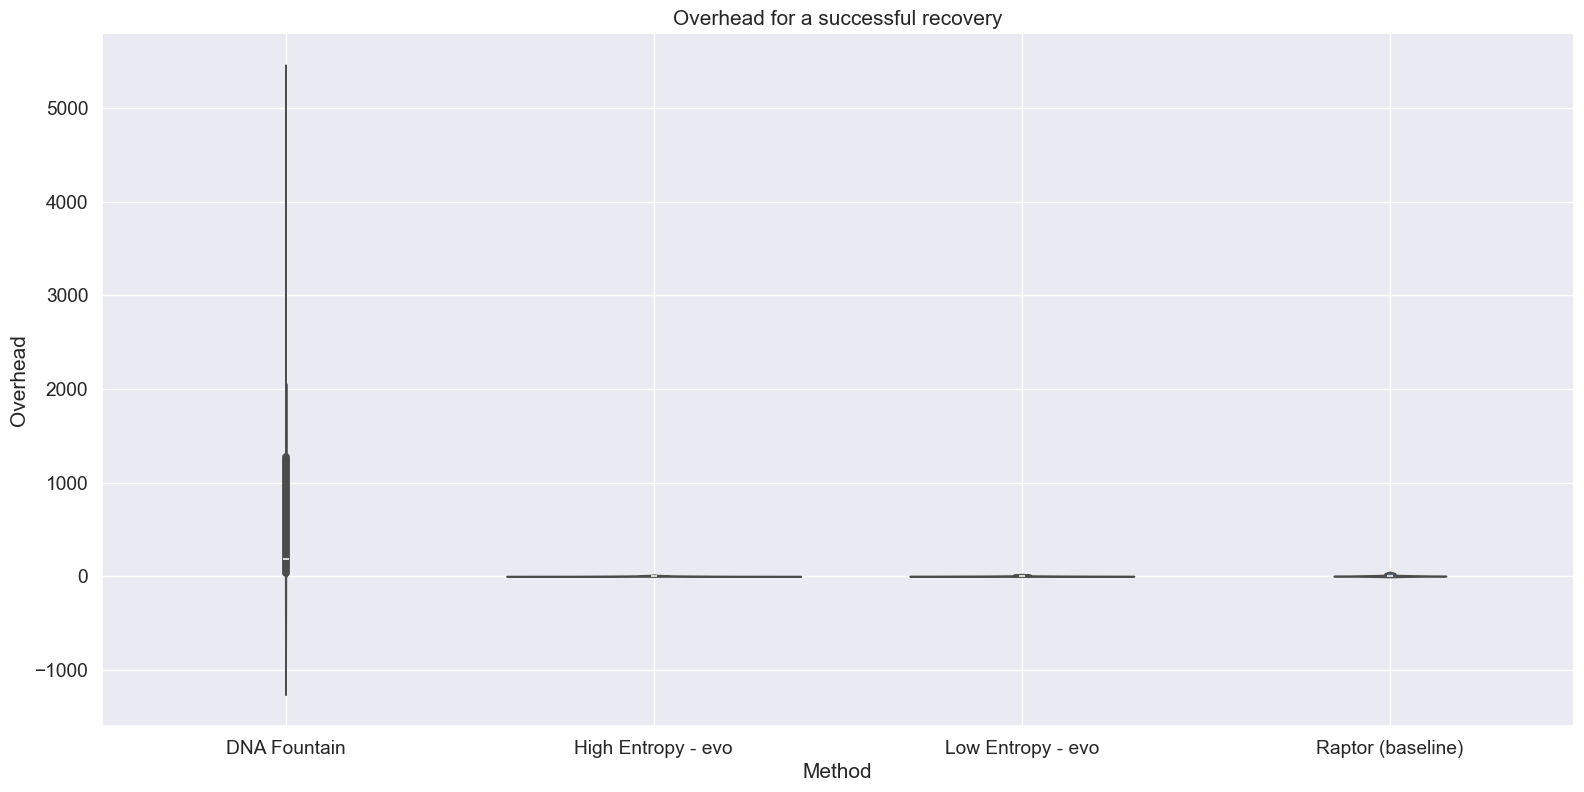

                    count         mean          std  min   25%    50%  \
Method                                                                  
DNA Fountain         60.0  1032.433333  1434.449181  0.0  34.5  189.5   
High Entropy - evo  161.0     2.503106     2.817632  0.0   0.0    1.0   
Low Entropy - evo   159.0     3.295597     4.410220  0.0   1.0    2.0   
Raptor (baseline)   169.0     7.100592     9.840178  0.0   1.0    3.0   

                        75%     max  
Method                               
DNA Fountain        1274.75  4198.0  
High Entropy - evo     4.00    13.0  
Low Entropy - evo      4.00    20.0  
Raptor (baseline)      7.00    40.0  


In [54]:
#fig = sns.catplot(kind='boxen', x="Method", y="overhead", hue="File", data=df, height=6, aspect=2)
# as a violinplot:
df = df[df.Method != "Raptor"]
df = df[df["#Chunks"] <= 80000] # 56708
# create a 19:9 figure:
plt.figure(figsize=(19,9))
sns.violinplot(x="Method", y="overhead", data=df, order=sorted(df.Method.unique()))
#plt.xticks(rotation=45, ha='right')
# sns.catplot(kind='violin', data=df, x="method", y=hp_meth, hue="filename_group", ax=ax, bw_method='scott')
plt.ylabel(f'Overhead')
plt.xlabel('Method')
plt.title(f'Overhead for a successful recovery')
#plt.ylim(-10, 13000)
plt.grid(True)
# ax.set_xticks(range(len(to_plot)))
# ax.set_xticklabels([x for x in to_plot.keys()])
# print([x for x in to_plot.keys()])
#plt.savefig(f"hp_{hp_len}_plot_same_len.pdf", bbox_inches="tight")
#plt.savefig(f"hp_{hp_len}_plot_same_len.svg")
plt.savefig(f"overhead_all.pdf", bbox_inches="tight")
plt.savefig(f"overhead_all.svg")
plt.savefig(f"overhead_all.eps")
plt.show(block=False)
print(df.groupby('Method')["overhead"].describe())
#print(df.groupby('Method')['overhead'].std())

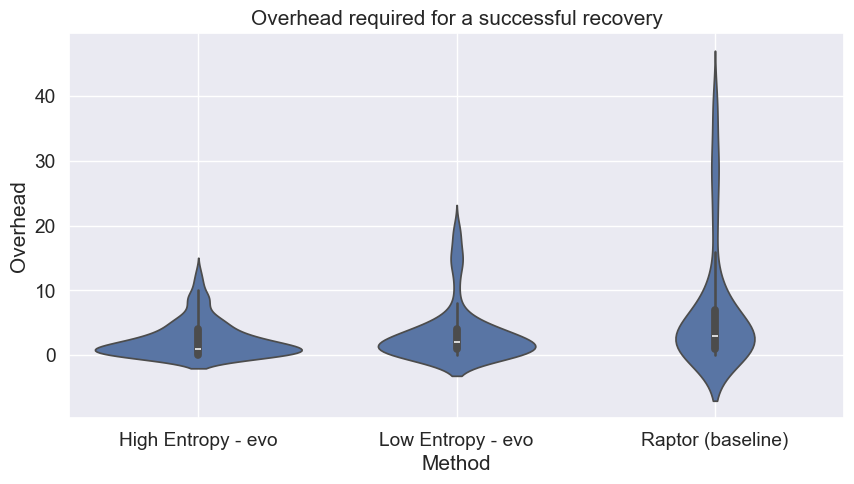

                    count      mean       std  min  25%  50%  75%   max
Method                                                                 
High Entropy - evo  161.0  2.503106  2.817632  0.0  0.0  1.0  4.0  13.0
Low Entropy - evo   159.0  3.295597  4.410220  0.0  1.0  2.0  4.0  20.0
Raptor (baseline)   169.0  7.100592  9.840178  0.0  1.0  3.0  7.0  40.0


In [55]:
#fig = sns.catplot(kind='boxen', x="Method", y="overhead", hue="File", data=df, height=6, aspect=2)
# as a violinplot:
#drop every row with Method == "DNA Founain":
df = df[df.Method != "DNA Fountain"]
df = df[df.Method != "Raptor"]
# plot the groups in alphabetical order:
sns.violinplot(x="Method", y="overhead", data=df, order=sorted(df.Method.unique()))
#plt.xticks(rotation=45, ha='right')
# sns.catplot(kind='violin', data=df, x="method", y=hp_meth, hue="filename_group", ax=ax, bw_method='scott')
plt.ylabel(f'Overhead')
plt.xlabel('Method')
plt.title(f'Overhead required for a successful recovery')
plt.grid(True)
# ax.set_xticks(range(len(to_plot)))
# ax.set_xticklabels([x for x in to_plot.keys()])
# print([x for x in to_plot.keys()])
plt.savefig(f"overhead_raptor.pdf", bbox_inches="tight")
plt.savefig(f"overhead_raptor.svg")
plt.savefig(f"overhead_raptor.eps")
plt.show(block=False)
print(df.groupby('Method')["overhead"].describe())

In [56]:
df

,overhead,unrecovered,run,Method,RS,#Chunks,File
0,1,301,0,Low Entropy - evo,3,604,0023-xlsx.xlsx
1,2,347,0,Low Entropy - evo,3,681,0024-xlsx.xlsx
2,3,295,1,Low Entropy - evo,3,604,0023-xlsx.xlsx
3,5,504,1,Low Entropy - evo,3,681,0024-xlsx.xlsx
4,0,0,2,Low Entropy - evo,3,604,0023-xlsx.xlsx
...,...,...,...,...,...,...,...
746,0,0,1,Low Entropy - evo,2,51777,0021-xlsx.xlsx
747,0,0,1,Low Entropy - evo,3,54131,0021-xlsx.xlsx
748,0,0,1,Low Entropy - evo,4,54932,0020-xlsx.xlsx
749,0,0,2,High Entropy - evo,2,50155,0020-xlsx.xlsx


## unrecovered

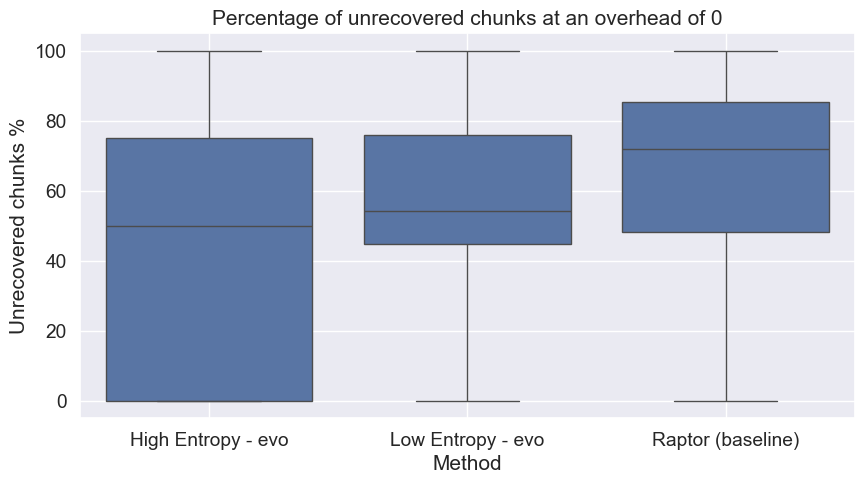

                    count         mean           std  min   25%    50%  \
Method                                                                   
High Entropy - evo  161.0  2751.894410   7435.884832  0.0   0.0   28.0   
Low Entropy - evo   159.0  2493.106918   7767.462023  0.0  12.0   32.0   
Raptor (baseline)   169.0  7447.940828  14903.909664  0.0  14.0  294.0   

                       75%      max  
Method                               
High Entropy - evo   460.0  45277.0  
Low Entropy - evo    473.0  49617.0  
Raptor (baseline)   5871.0  50134.0  
                    count       mean        std  min        25%        50%  \
Method                                                                       
High Entropy - evo  161.0  47.237798  31.840389  0.0   0.000000  50.014485   
Low Entropy - evo   159.0  53.594801  32.859629  0.0  44.708847  54.081633   
Raptor (baseline)   169.0  63.452171  27.648134  0.0  48.275862  72.043011   

                          75%    max  
Method   

In [57]:
#fig = sns.catplot(kind='boxen', x="Method", y="overhead", hue="File", data=df, height=6, aspect=2)
# as a violinplot:
#drop every row with Method == "DNA Founain":
#df = df[df.Method != "DNA Fountain"]
df = df[df.Method != "Raptor"]
df["Unrecovered %"] = df["unrecovered"] / df["#Chunks"] * 100

sns.boxplot(x="Method", y="Unrecovered %", data=df, order=sorted(df.Method.unique()))
#plt.xticks(rotation=45, ha='right')
# sns.catplot(kind='violin', data=df, x="method", y=hp_meth, hue="filename_group", ax=ax, bw_method='scott')
plt.ylabel(f'Unrecovered chunks %')
plt.xlabel('Method')
plt.title(f'Percentage of unrecovered chunks at an overhead of 0')
plt.grid(True)
# ax.set_xticks(range(len(to_plot)))
# ax.set_xticklabels([x for x in to_plot.keys()])
# print([x for x in to_plot.keys()])
#plt.savefig(f"hp_{hp_len}_plot_same_len.pdf", bbox_inches="tight")
#plt.savefig(f"hp_{hp_len}_plot_same_len.svg")
plt.savefig(f"unrecovered_raptor.pdf", bbox_inches="tight")
plt.savefig(f"unrecovered_raptor.svg")
plt.savefig(f"unrecovered_raptor.eps")
plt.show(block=False)
# print the mean of the _unrecovered_ for each method:
print(df.groupby('Method')['unrecovered'].describe())

print(df.groupby('Method')['Unrecovered %'].describe())

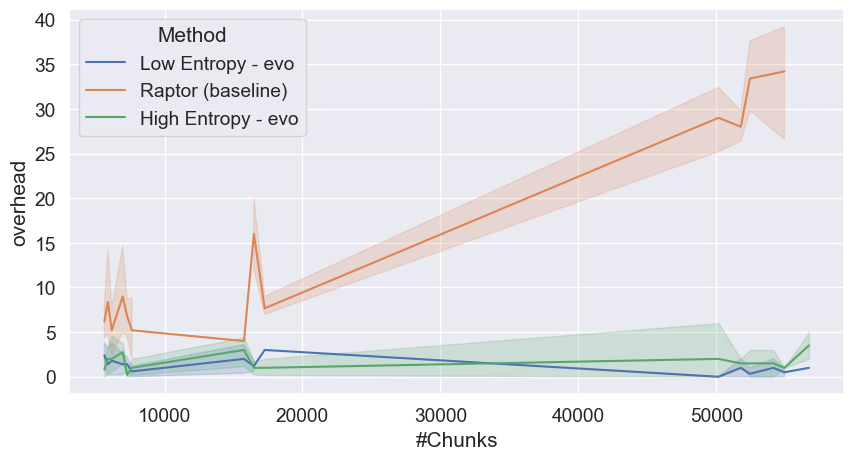

In [58]:
# line plot for each method, with x as the number of chunks and y as the "Overhead %":
# remove all rows with a chunk size of less than 50:
df2 = df[df["#Chunks"] >= 1000] #[df["#Chunks"] <= 60000]
fig = sns.lineplot(x="#Chunks", y="overhead", hue="Method", data=df2)

In [59]:
df2

,overhead,unrecovered,run,Method,RS,#Chunks,File,Unrecovered %
20,5,2902,0,Low Entropy - evo,3,5896,0022-xlsx.xlsx,49.219810
51,1,3628,0,Low Entropy - evo,3,7290,0030-zip-highcompress.zip,49.766804
52,1,4442,1,Low Entropy - evo,3,5896,0022-xlsx.xlsx,75.339213
53,0,0,2,Low Entropy - evo,3,5896,0022-xlsx.xlsx,0.000000
54,0,0,1,Low Entropy - evo,3,7290,0030-zip-highcompress.zip,0.000000
...,...,...,...,...,...,...,...,...
746,0,0,1,Low Entropy - evo,2,51777,0021-xlsx.xlsx,0.000000
747,0,0,1,Low Entropy - evo,3,54131,0021-xlsx.xlsx,0.000000
748,0,0,1,Low Entropy - evo,4,54932,0020-xlsx.xlsx,0.000000
749,0,0,2,High Entropy - evo,2,50155,0020-xlsx.xlsx,0.000000
